# Use-Cases of TDA Usage on 3D Shapes

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

import warnings, tqdm

warnings.simplefilter('ignore')
from filtration.filtration import *

pyo.init_notebook_mode(connected=True)
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


### Load the 3D cloud point

In [2]:
def load_3D_shape(filepath):

    vec = []
    num = sum(1 for line in open(filepath, 'r'))

    with open(filepath, 'r') as raw:
        for idx in tqdm.tqdm(range(num)):
            tmp = raw.readline().split(' ')
            if len(tmp) == 3: vec.append(np.asarray(tmp).astype('float'))

    vec = np.vstack(vec)
    
    return vec

vec = load_3D_shape('./samples/hand.off')

100%|██████████| 21722/21722 [00:00<00:00, 382618.23it/s]


### Build the persistence, and extract the components of dimension 0

In [3]:
flt = Filtration(vec, use_alpha=False)
flt.persistence(persistence_type='simple', dimension=0)

### Compute the relative betti curve, based on dimension 0 components

In [4]:
btc = flt.betti_curve()

### Compute the relative landscapes, based on dimension 0 components

In [5]:
ldc = flt.landscapes()

### General visualization

In [6]:
# Recast persistence diagram for gudhi visualization tools
dig = [(0, tuple(e)) for e in flt.fil]

Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals


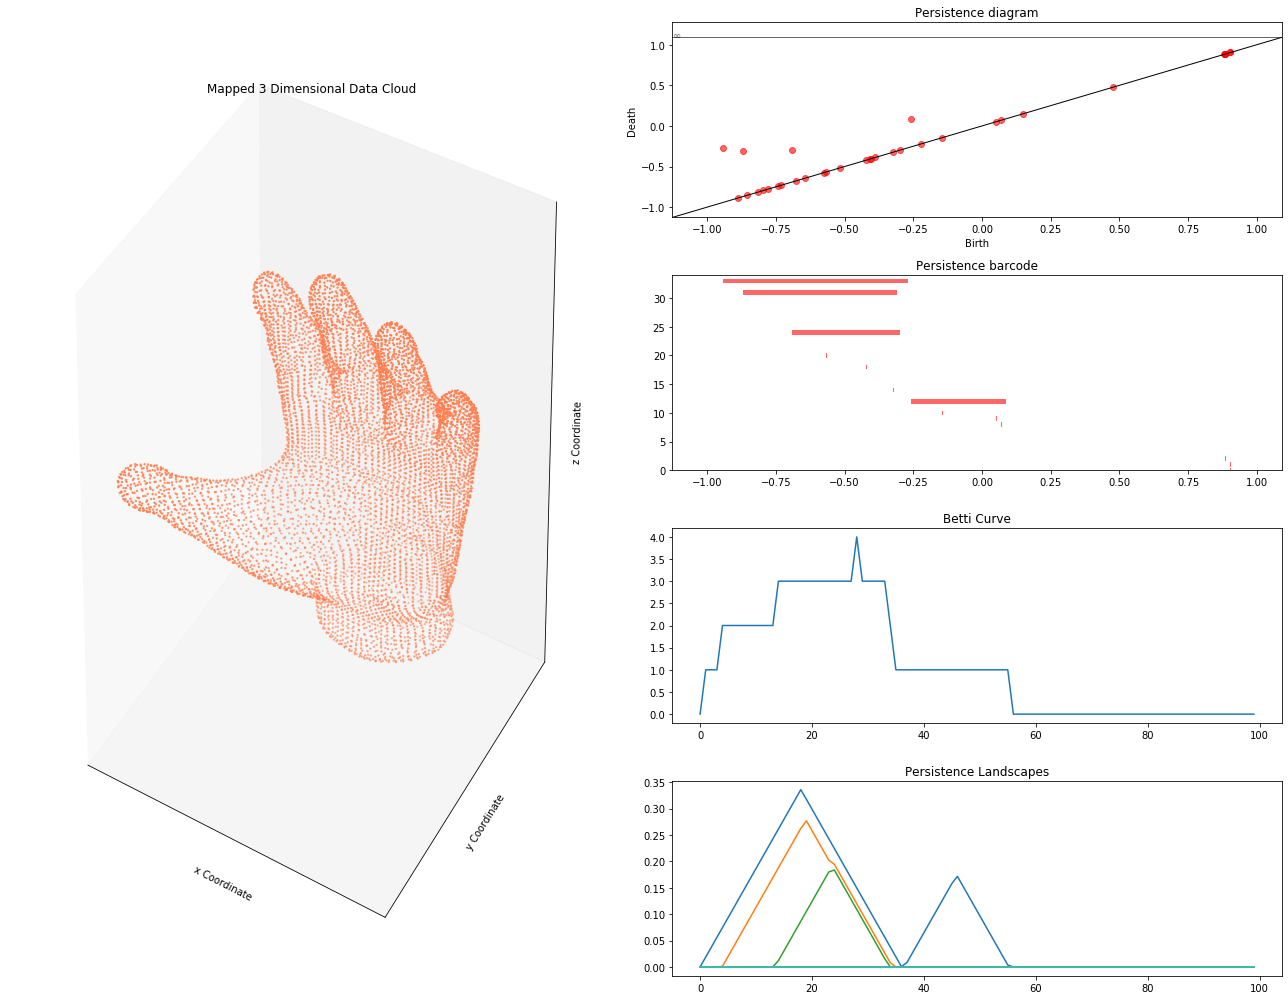

In [7]:
plt.figure(figsize=(18,14))
fig = gds.GridSpec(4, 2)
ax0 = plt.subplot(fig[:,0], projection='3d')
ax0.set_title('Mapped 3 Dimensional Data Cloud')
ax0.set_xticks([])                               
ax0.set_yticks([])                               
ax0.set_zticks([])
ax0.scatter(vec[:,0], vec[:,1], vec[:,2], s=2, c='coral')
ax0.set_xlabel('x Coordinate')
ax0.set_ylabel('y Coordinate')
ax0.set_zlabel('z Coordinate')
plt.subplot(fig[0,1])
gudhi.plot_persistence_diagram(dig)
plt.subplot(fig[1,1])
gudhi.plot_persistence_barcode(dig)
plt.subplot(fig[2,1])
plt.title('Betti Curve')
plt.plot(btc)
plt.subplot(fig[3,1])
plt.title('Persistence Landscapes')
for ele in ldc: plt.plot(ele)
plt.tight_layout()
plt.show()